### Student Information
Name: 雲聿加

Student ID: 112034609

GitHub ID: 

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 


In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import sys


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
twenty_train

{'data': ['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
  "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of

In [4]:
attributes = [attr for attr in dir(twenty_train) if not attr.startswith("__")]
for attr in attributes:
    print(attr)

DESCR
data
filenames
target
target_names


In [7]:
import sys
sys.path.append(r'C:\Users\Julia Yun\Downloads\DMLab1')

import helpers.data_mining_helpers as dmh


In [9]:
import pandas as pd

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# **Exercise 2 (take home):**

In [10]:
#chabge the content value between text and category
a=X
a[['text', 'category']] = a[['category', 'text']]
a

text                                           category  \
0        1  From: sd345@city.ac.uk (Michael Collier) Subje...   
1        1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...   
2        3  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...   
3        3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...   
4        3  From: stanly@grok11.columbiasc.ncr.com (stanly...   
...    ...                                                ...   
2252     2  From: roos@Operoni.Helsinki.FI (Christophe Roo...   
2253     2  From: mhollowa@ic.sunysb.edu (Michael Holloway...   
2254     2  From: sasghm@theseus.unx.sas.com (Gary Merrill...   
2255     2  From: Dan Wallach <dwallach@cs.berkeley.edu> S...   
2256     2  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [11]:
a[['text', 'category']] = a[['category', 'text']]
b=X
b.loc[:5,'text']
b

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

In [12]:
X.iloc[0:5, 0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

**------------------------------------------------------**

#  Exercise 5 (take home)

In [13]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [14]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**My Answer:**

To see from the provided data, we'll assume that there is missing value. But the reason that each row have missing value or not, is as below.
0. np.nan is a syntax for missing value
1. There is no such column so it's also a missing value
2. The NaN here is in string type, so the NaN stands for the word not a condition.
3. The None here is in string type, so the NaN stands for the word not a condition.
4. The None here is not a string, so it stands for condition.
5. There is a string area here, so it contains the value that is not typing anyting.

**------------------------------------------------------**

In [15]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

# Exercise 6 (take home):

In [16]:
#Oberving the length of two data frame
print(len(X))
print(len(X_sample))

2257
1000


In [17]:
X_sample[0:10]

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
535   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
809   From: JEK@cu.nih.gov Subject: Thinking about h...         3   
2002  From: asket@acad2.alaska.edu Subject: When is ...         3   
2166  Subject: XLib and 24 Bit Displays [Info Needed...         1   
1272  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
535              alt.atheism  
809   soc.religion.christian  
2002  soc.religion.christian  
2166           comp.graphics  
1272                 sci.med

In [18]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

**My Answer**


The sample data and orinal data is differnt in the size of the data amount. And we can know from the index of two data frame, that the data is randomly picked that it didn't follow the sequence of the index.


**------------------------------------------------------**

# Exercise 8 (take home):

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'combined_data' is not defined

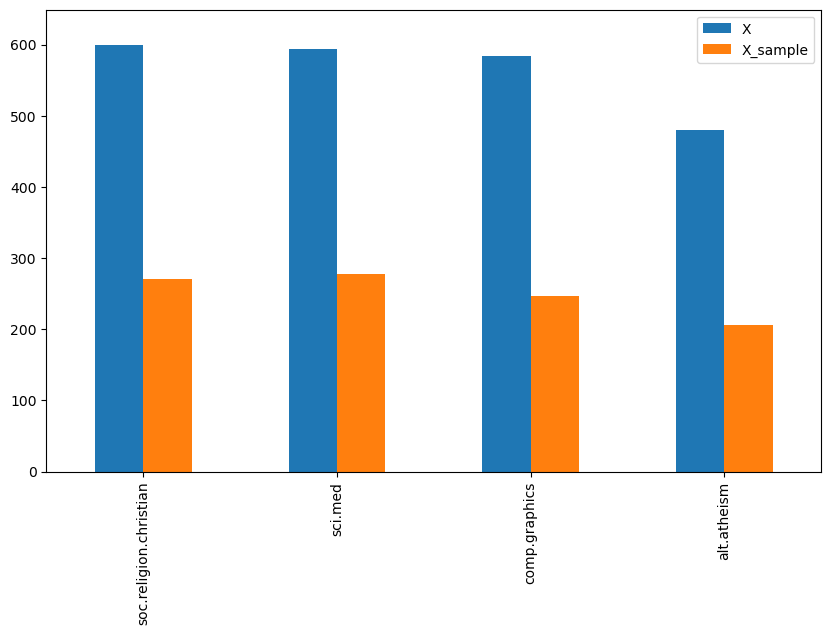

In [20]:
#Create a new dataframe that puts the two data frames together, and the sequence shall follow index.
data= pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
data.columns = ['X', 'X_sample']
ax = data.plot(kind='bar',
                        figsize=(10, 6))
#Try to find the upperbound of the data
upper_bound = max(max(X_sample.category_name.value_counts() + 50), max(X.category_name.value_counts() + 50))
ax.set_ylim([0, upper_bound]) 
ax.set_xticklabels(combined_data.index, rotation=0)

ax.set_title('Category Distribution')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.legend(["X", "X_sample"], fontsize=11)

plt.show()


**------------------------------------------------------**

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Julia
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze("Today is a sunny day")

['today', 'is', 'sunny', 'day']

In [36]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  
...                                                 ...  
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...  
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...  
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...  
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...  
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...  

[2257 rows x 4 columns]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])  # Assuming the column is named 'text'
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

# Exercise 10 (take home):

In [38]:
# find the index that appears to be 1
count=0
index=[]
for i in range(100):
    if(X_counts[4,i]==1):
        count+=1
        index=i
# This is the answer!
print(index)

37


In [39]:
#and print out the result with the index
count_vect.get_feature_names()[37]  

C:\Users\Julia Yun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'01'

# Exercise 11 (take home):

In [40]:
#We can know the shape of data from here
print(X_counts.shape)

(2257, 35788)


In [41]:
X_array = X_counts[0:2257, 0:35788].toarray()

# Calculate the sum along rows (axis=0)
sums = np.sum(X_array, axis=0)
for number in sums:
    print(number)

134
92
1
2
1
3
1
1
1
1
2
1
1
3
1
1
1
2
1
3
1
2
1
1
1
2
1
1
1
1
1
1
1
1
5
1
13
95
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
4
2
1
1
1
1
1
2
1
1
1
1
1
2
1
59
1
4
2
1
1
1
1
2
3
1
2
1
1
1
1
3
1
1
1
3
1
1
3
2
1
2
2
1
1
3
100
1
1
1
1
1
1
2
1
2
1
2
1
2
5
24
1
1
1
1
2
47
4
1
1
1
1
1
3
1
1
4
2
2
1
1
62
2
2
1
1
1
2
1
5
1
1
1
1
1
1
1
1
1
1
18
3
1
1
3
2
1
1
3
2
1
1
1
1
1
27
1
1
1
7
1
1
2
2
1
1
1
1
1
1
40
1
2
1
1
5
1
1
1
5
1
1
1
1
1
34
1
2
1
1
1
1
2
2
2
1
1
1
2
2
1
1
1
4
2
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
378
105
20
2
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
1
1
1
19
1
3
4
8
2
1
2
2
1
1
7
3
1
5
1
1
1
7
1
1
2
1
1
2
1
1
4
1
3
1
1
5
1
1
1
1
5
1
1
1
1
6
1
1
1
1
2
1
2
1
1
1
3
1
1
1
11
2
1
1
1
1
1
1
1
5
1
215
16
4
2
1
6
6
3
1
1
1
5
1
1
1
1
3
1
1
1
5
8
2
1
1
2
1
10
4
1
1
3
1
1
1
1
5
1
1
1
3
2
2
2
1
1
3
1
1
1
1
1
1
2
1
1
1
4
5
7
5
3
7
4
1
1
1
1
1
1
2
1
2
1
3
1
1
1
3
1
2
2
1
1
1
1
3
1
1
1
4
1
1
2
1
236
9
9
1
1
1
1
1
1
4
2
2
5
1
2
2
1
1
2
2
1
5
1
1
1
2
1
5
1
1
8
1
1
2
1
1
2
1
1
1
1
2
3
1
3
1
1
1
1
2
2
1
1
1
3


In [42]:
#the word that appears the most
largest = np.amax(sums)

In [43]:
#the average time a word would appear
mean = np.mean(sums)
mean

19.310355426399912

In [44]:
doc_sums = np.sum(X_array, axis=1)
for i in doc_sums:
    print(i)

98
167
554
86
165
290
262
486
152
524
742
145
814
91
140
85
144
36
68
154
108
313
187
48
291
177
25
126
216
125
398
409
275
262
320
39
218
399
701
80
95
151
56
121
360
464
118
120
213
182
319
212
150
191
787
76
779
431
152
194
128
77
108
261
104
172
246
96
332
131
297
119
135
148
478
93
256
244
526
72
273
242
275
154
57
130
214
181
70
100
158
78
126
175
284
138
65
743
112
138
244
228
310
136
496
533
235
310
825
113
477
340
338
467
127
112
63
144
142
183
391
178
287
4198
148
161
169
445
189
342
130
68
127
313
111
1157
248
132
278
200
99
100
638
117
132
199
27
249
294
95
364
144
405
432
544
68
547
91
347
1879
280
118
165
130
158
197
197
195
131
191
291
539
147
435
58
305
101
445
1876
293
208
317
239
78
259
327
825
92
622
168
343
607
453
341
203
199
90
389
154
1072
1063
47
90
185
160
192
129
78
395
1668
265
626
146
206
142
352
224
66
421
228
136
342
400
138
488
116
176
249
174
77
285
814
226
687
215
555
160
70
180
82
300
74
302
287
893
63
176
317
177
100
479
641
360
172
366
354
265
100
19

In [45]:
#find the top 20 word frequency-doc
doc20 = np.partition(doc_sums, -20)[-20:]
for i in doc20:
    print(i)

2235
4056
2434
4417
4602
8470
5144
3355
8453
4983
4271
9374
2275
2480
4198
2830
6698
3258
2814
8845


In [46]:
#find the top 20 word frequency
largest20 = np.partition(sums, -20)[-20:]
for i in largest20:
    print(i)

3655
3709
4015
4218
10723
4877
17222
11226
4769
17660
29825
4898
13017
5285
4675
8447
5962
12343
5063
6157


**From this we can know that doc with the most 20 words is about 2200.**

In [47]:
#find the top 20 position
indices = np.where(np.isin(sums, largest20))
print(indices)

(array([ 4992,  5410,  5549,  6298, 12626, 14601, 14887, 16254, 17556,
       18474, 18551, 23250, 23610, 23733, 32139, 32142, 32270, 32493,
       35157, 35638], dtype=int64),)


In [48]:
#print out the word
vocab=[]
for i in indices:
    vocab.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])

['and' 'are' 'as' 'be' 'edu' 'for' 'from' 'have' 'in' 'is' 'it' 'not' 'of'
 'on' 'that' 'the' 'this' 'to' 'with' 'you']


# Finding

From the above, i found that except for "edu" other words appear to be meaningless word. So I'll try a larger range to find more important words.

In [49]:
#Observing the top 40

vocab2=[]

largest40 = np.partition(sums, -40)[-40:]
indices40 = np.where(np.isin(sums, largest40))


for i in indices40:
    vocab2.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])

['an' 'and' 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'do' 'edu' 'for' 'from'
 'god' 'have' 'he' 'if' 'in' 'is' 'it' 'lines' 'not' 'of' 'on' 'one' 'or'
 'organization' 're' 'subject' 'that' 'the' 'there' 'they' 'this' 'to'
 'was' 'we' 'what' 'with' 'you']


 It appears that 'edu','god','lines','organization' and 'subject' are meaningful words. So I'll plot these five words.

In [50]:
#Observing the top 100

vocab3=[]

largest100 = np.partition(sums, -100)[-100:]
indices100 = np.where(np.isin(sums, largest100))


for i in indices100:
    vocab3.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])

['about' 'all' 'also' 'am' 'an' 'and' 'any' 'are' 'article' 'as' 'at' 'be'
 'because' 'been' 'believe' 'but' 'by' 'can' 'com' 'do' 'does' 'don' 'edu'
 'for' 'from' 'get' 'god' 'good' 'had' 'has' 'have' 'he' 'his' 'how' 'if'
 'in' 'is' 'it' 'jesus' 'just' 'know' 'like' 'lines' 'many' 'may' 'me'
 'more' 'my' 'no' 'not' 'of' 'on' 'one' 'only' 'or' 'organization' 'other'
 'out' 'people' 'posting' 're' 'say' 'see' 'should' 'so' 'some' 'subject'
 'such' 'than' 'that' 'the' 'their' 'them' 'then' 'there' 'these' 'they'
 'think' 'this' 'time' 'to' 'university' 'up' 'us' 'use' 'very' 'was' 'we'
 'were' 'what' 'when' 'which' 'who' 'why' 'will' 'with' 'would' 'writes'
 'you' 'your']


In [51]:
#Filter out Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
largest100 = ['about', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'article', 'as', 'at', 'be', 'because', 'been', 'believe', 'but', 'by', 'can', 'com', 'do', 'does', 'don', 'edu', 'for', 'from', 'get', 'god', 'good', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'is', 'it', 'jesus', 'just', 'know', 'like', 'lines', 'many', 'may', 'me', 'more', 'my', 'no', 'not', 'of', 'on', 'one', 'only', 'or', 'organization', 'other', 'out', 'people', 'posting', 're', 'say', 'see', 'should', 'so', 'some', 'subject', 'such', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'think', 'this', 'time', 'to', 'university', 'up', 'us', 'use', 'very', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'why', 'will', 'with', 'would', 'writes', 'you', 'your']
stop_words = set(stopwords.words('english'))
mask = [word for word in largest100 if word not in stop_words]
print(mask)

['also', 'article', 'believe', 'com', 'edu', 'get', 'god', 'good', 'jesus', 'know', 'like', 'lines', 'many', 'may', 'one', 'organization', 'people', 'posting', 'say', 'see', 'subject', 'think', 'time', 'university', 'us', 'use', 'would', 'writes']


[nltk_data] Downloading package stopwords to C:\Users\Julia
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
vocab_index = []
feature_names = count_vect.get_feature_names_out()
feature_index_mapping = {feature: index for index, feature in enumerate(feature_names)}

for feature in mask:
    if feature in feature_index_mapping:
        vocab_index.append(feature_index_mapping[feature])

In [53]:
vocab_index

[4808,
 5529,
 6430,
 9072,
 12626,
 15319,
 15521,
 15576,
 18774,
 19458,
 20198,
 20253,
 20978,
 21209,
 23741,
 23915,
 24784,
 25663,
 28755,
 29121,
 31077,
 32253,
 32417,
 33597,
 33847,
 33858,
 35312,
 35350]

In [54]:
    print(count_vect.get_feature_names_out()[35350])

writes


In [55]:
# which vocab to plot
plot_x = ["term_"+str(i) for i in mask]
print(plot_x)

['term_also', 'term_article', 'term_believe', 'term_com', 'term_edu', 'term_get', 'term_god', 'term_good', 'term_jesus', 'term_know', 'term_like', 'term_lines', 'term_many', 'term_may', 'term_one', 'term_organization', 'term_people', 'term_posting', 'term_say', 'term_see', 'term_subject', 'term_think', 'term_time', 'term_university', 'term_us', 'term_use', 'term_would', 'term_writes']


In [56]:
#choose random document
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [57]:
plot_z = []
for i in range(20):
    doc_freq = []
    for n in vocab_index:
        doc_freq.append(X_counts[i, n])
    plot_z.append(doc_freq)

term_also  term_article  term_believe  term_com  term_edu  term_get  \
doc_0           1             0             0         0         0         0   
doc_1           0             0             0         0         1         1   
doc_2           3             0             1         0         2         0   
doc_3           0             0             0         0         0         0   
doc_4           0             2             1         2         2         0   
doc_5           1             1             0         0         2         0   
doc_6           0             1             0         1         2         0   
doc_7           1             0             0         1         0         1   
doc_8           0             2             0         0         6         0   
doc_9           0             0             0         0         2         0   
doc_10          3             2             0         1         3         1   
doc_11          1             0             0         0         3         0   
doc_12          0             1             1         2         0         0   
doc_13          0             0             0         2         0         0   
doc_14          0             1             0         2         2         0   
doc_15          0             0             0         0         0         1   
doc_16          0             1             0         3         1         2   
doc_17          0             0             0         0         1         0   
doc_18          0             0             0         1         0         0   
doc_19          0             1             0         0         4         0   

        term_god  term_good  term_jesus  term_know  ...  term_say  term_see  \
doc_0          0          1           0          1  ...         0         0   
doc_1          0          0           0          1  ...         0         0   
doc_2          0          1           0          2  ...         0         0   
doc_3          0          0           0          0  ...         0         0   
doc_4          0          0           2          0  ...         0         0   
doc_5          0          0           0          0  ...         1         0   
doc_6          3          2           0          1  ...         0         0   
doc_7          0          1           0          1  ...         1         0   
doc_8          0          0           0          0  ...         0         0   
doc_9          0          1           0          0  ...         1         0   
doc_10         6          0           0          2  ...         1         2   
doc_11         0          0           0          0  ...         0         0   
doc_12        17         11           0          3  ...         3         0   
doc_13         0          0           0          0  ...         0         0   
doc_14         0          0           0          0  ...         0         0   
doc_15         0          0           0          0  ...         0         0   
doc_16         0          1           0          0  ...         0         0   
doc_17         1          0           0          0  ...         0         0   
doc_18         0          0           0          0  ...         0         0   
doc_19         0          0           0          0  ...         0         0   

        term_subject  term_think  term_time  term_university  term_us  \
doc_0              1           0          0                2        0   
doc_1              1           0          0                1        0   
doc_2              1           0          0                0        0   
doc_3              1           0          0                0        0   
doc_4              1           0          0                0        0   
doc_5              1           0          0                0        0   
doc_6              1           2          0                1        1   
doc_7              1           1          0                0        0   
doc_8              1           

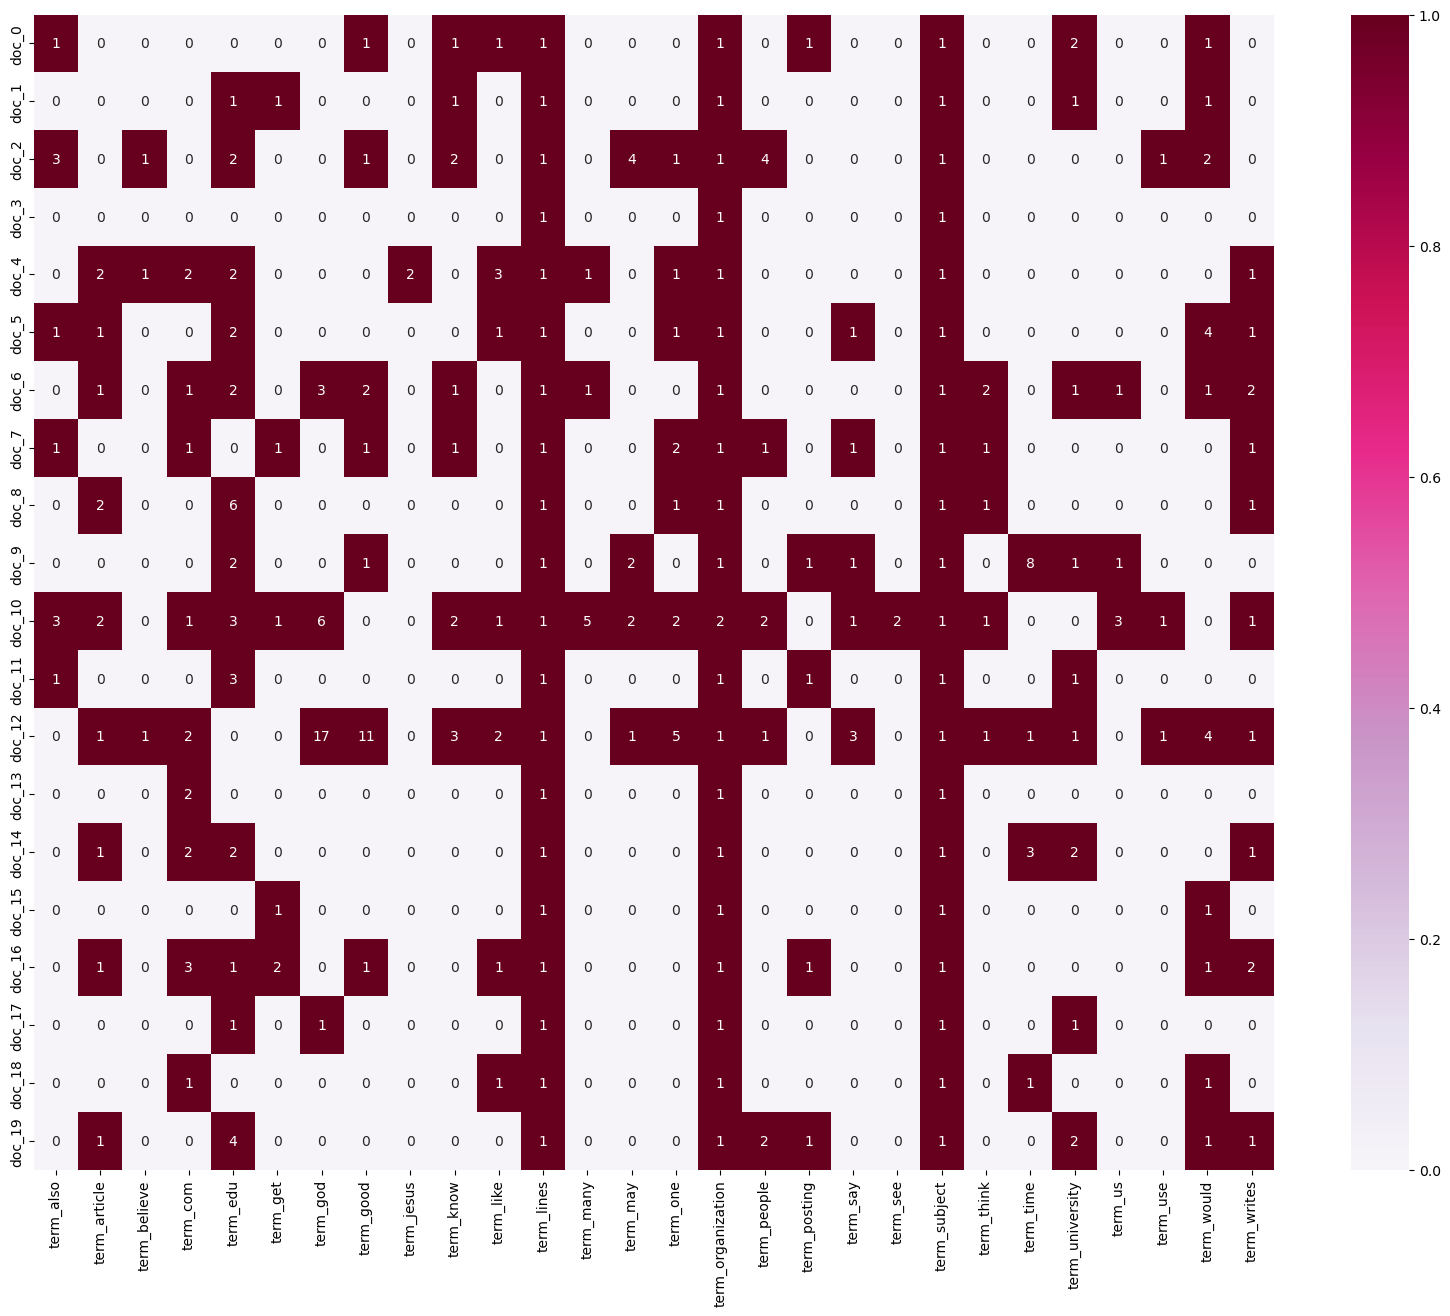

In [58]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**------------------------------------------------------**

# Exercise 12 (take home):

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


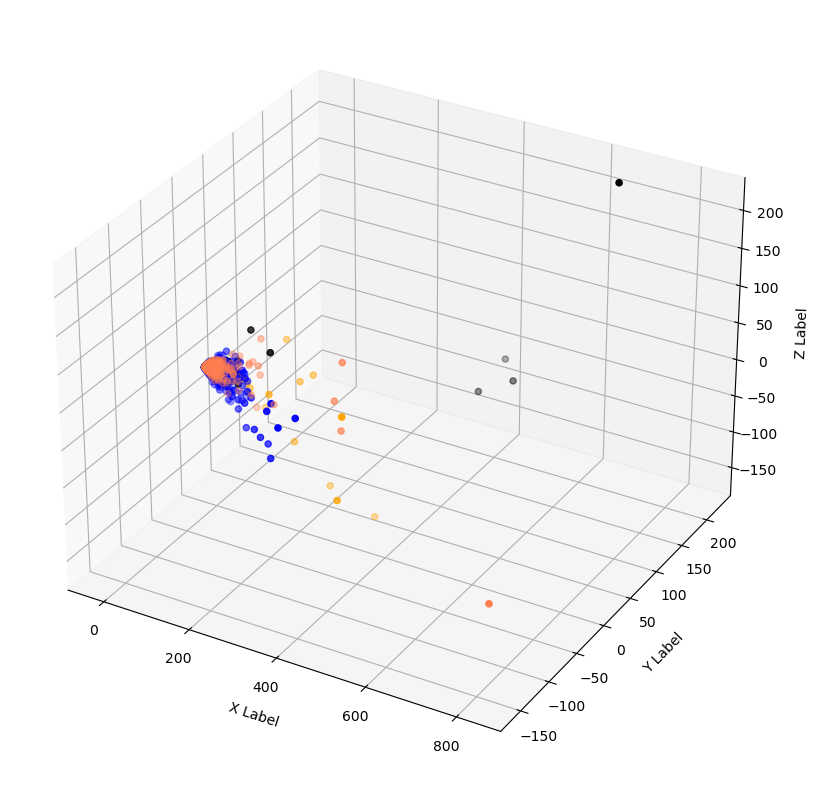

In [60]:

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

**My Answer**

From three dimensional pic, we can know that some points is not the same place. Even though it is on the same plave on two dimensional picture.

# Exercise 13 (take home):

In [61]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [62]:
import pandas as pd
import plotly.express as px

# The data that is going to draw
data = pd.DataFrame({
    'Words': count_vect.get_feature_names_out()[:300],
    'Word Frequencies': term_frequencies[:300]
})

fig = px.bar(
    data, x='Words', y='Word Frequencies',
    title="Interactive Bar Chart of Word Frequency"
)

fig.update_xaxes(tickangle=45)  
fig.update_layout(
    width=3000, 
    height=400   
)

fig.show()

# Exercise 14 (take home):

In [63]:
#find the word that appears more than 2200 times
mask = term_frequencies >= 2200

In [64]:
index=[]
for i in enumerate(mask):
    if i[1]==True:
        index.append(i[0])

vocab=[]
for i in index:
    vocab.append(count_vect.get_feature_names()[i])

times=[]
sums = np.sum(X_array, axis=0)
for i in index:
    times.append(sums[i])
vocab.sort()
times.sort()

C:\Users\Julia Yun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



NameError: name 'name' is not defined

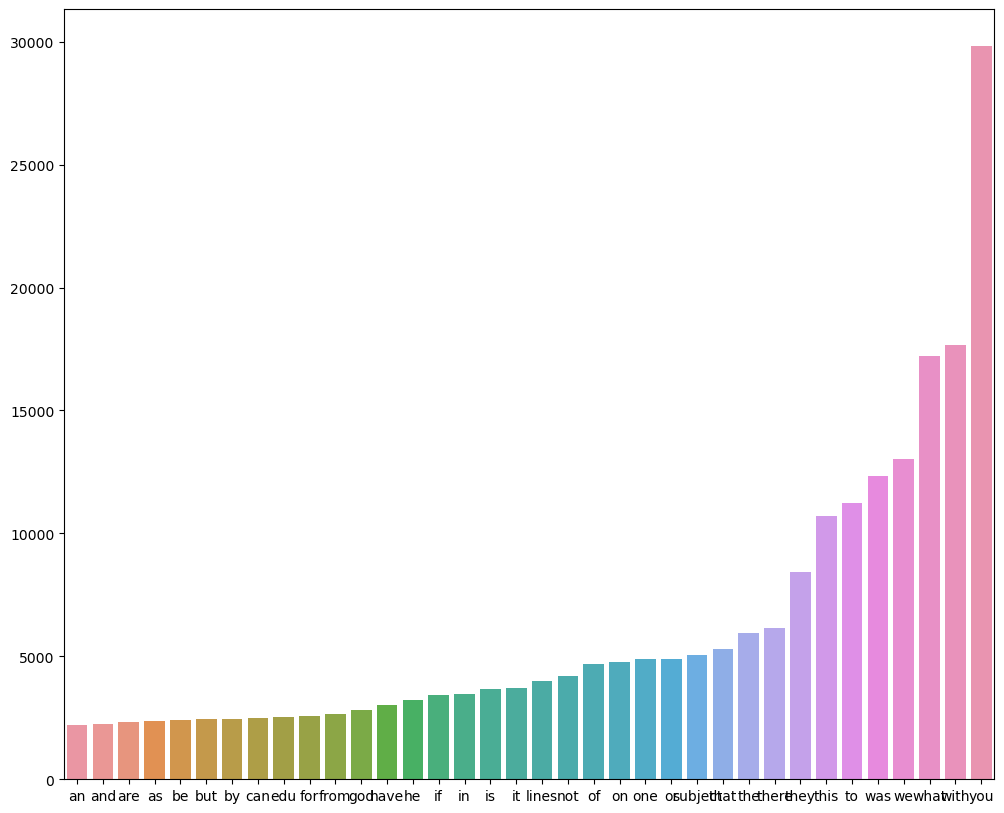

In [65]:
plt.subplots(figsize=(12, 10))


g = sns.barplot(x=vocab, 
            y=times)
g.set_xticklabels(name, rotation = 90);

# Exercise 15 (take home):

In [66]:
data = pd.DataFrame({
    'Words': count_vect.get_feature_names_out()[:300],
    'Word Frequencies': term_frequencies[:300]
})
df = data.sort_values(by='Word Frequencies', ascending=False)


In [67]:
fig = px.bar(
    df, x='Words', y='Word Frequencies',
    title="Long-Tail nteractive Bar Chart of Word Frequency"
)

fig.update_xaxes(tickangle=45)  
fig.update_layout(
    width=3000, 
    height=400   
)

fig.show()

# Exercise 16 (take home):

In [68]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [69]:
mlb.fit(X.category_name)

LabelBinarizer()

In [70]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [71]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  bin_category  
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]  
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]  
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  [0, 0, 0, 1]  
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  [0, 0, 0, 1]  
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  [0, 0, 0, 1]  
...                                                 ...           ...  
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...  [0, 0, 1, 0]  
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...  [0, 0, 1, 0]  
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...  [0, 0, 1, 0]  
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...  [0, 0, 1, 0]  
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...  [0, 0, 1, 0]  

[2257 rows x 5 columns]

**My Answer**

It also works when using category_name. That it will mark the category "1" at the corresponding position.  

**------------------------------------------------------**

# Part 2

# Data Preparation

In [205]:
amazon= pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt',header=None)
imdb= pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt',header=None)
yelp= pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt',header=None)

In [206]:
amazon = amazon.rename(columns={0: 'sentence', 1: 'score'})
imdb = imdb.rename(columns={0: 'sentence', 1: 'score'})
yelp = yelp.rename(columns={0: 'sentence', 1: 'score'})

In [207]:
print(len(amazon))
print(len(imdb))
print(len(yelp))

1000
748
1000


In [208]:
print(amazon.head())
print(imdb.head())
print(yelp.head())

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
                                            sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1
                                            sentence  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank h

In [209]:
import pandas as pd
df = pd.concat([amazon, imdb, yelp], ignore_index=True)
df

sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]

In [83]:
df[0:2]

sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [84]:
# 各種資料測試
print("\n".join(df.loc[4,'sentence'].split()))

The
mic
is
great.


In [87]:
print(df.shape)

(2748, 2)


In [88]:
len(df)

2748

In [94]:
df.iloc[1:5, 1:5]

score
1      1
2      1
3      0
4      1

# Data Mining using Pandas

In [96]:
df.isnull()

sentence  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2743     False  False
2744     False  False
2745     False  False
2746     False  False
2747     False  False

[2748 rows x 2 columns]

In [97]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

# Dealing with Duplicate Data

In [98]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [99]:
sum(df.duplicated())

17

In [100]:
sum(df.duplicated('sentence'))

17

In [102]:
#列出重複列
df[df.duplicated('sentence')]

sentence  score
285                                       Great phone!.      1
407                                        Works great.      1
524                                       Works great!.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
792                                        Great Phone.      1
892                    Excellent product for the price.      1
896                                        Great phone.      1
1165                   Definitely worth checking out.        1
1387                                 Not recommended.        0
1590                                            10/10        1
2562                                 I love this place.      1
2564                             The food was terrible.      0
2591                                   I won't be back.      0
2594                  I would not recommend this place.      0

In [210]:
# 去除重複值
df.drop_duplicates(inplace=True) 

In [211]:
# 去除重複值資料量
print(len(df))

2731


# Data Preprocessing

In [105]:
#sample 1000筆資料
print(df.shape)
df_sample = df.sample(n=1000,random_state=42) #random state
display(df_sample)

(2731, 2)


sentence  score
1009  Loved the casting of Jimmy Buffet as the scien...      1
2041  I live in the neighborhood so I am disappointe...      0
1506                 DELETE this film from your mind!        0
951           Very much disappointed with this company.      0
73               Nice docking station for home or work.      1
...                                                 ...    ...
1998                  Owner's are really great people.!      1
1679  I do not know if this was Emilio Estevez's dir...      1
2477         As for the service, I thought it was good.      1
2660  i felt insulted and disrespected, how could yo...      0
1922  Everything on the menu is terrific and we were...      1

[1000 rows x 2 columns]

In [106]:
len(df_sample)

1000

In [107]:
X_sample[0:4]

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian

In [108]:
#draw plots
#套件
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [112]:
len(df)

2731

1    1376
0    1355
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

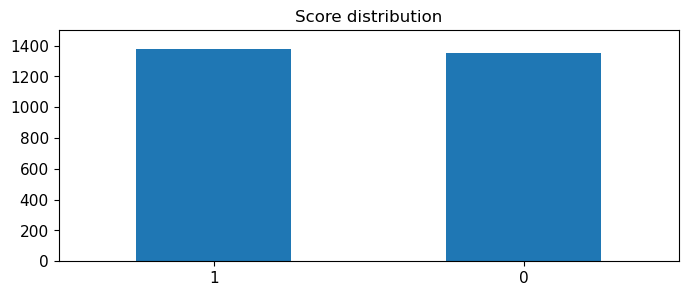

In [113]:
# plot barchart for df
print(df.score.value_counts())
df.score.value_counts().plot(kind = 'bar',
                            title = 'Score distribution',
                            ylim = [0, 1500],        
                            rot = 0, fontsize = 11, figsize = (8,3))

1    511
0    489
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

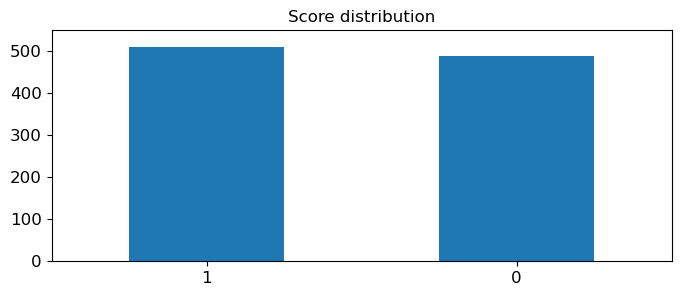

In [116]:
## plot barchart for df_sample
print(df_sample.score.value_counts())

# plot barchart for X_sample
df_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 550], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

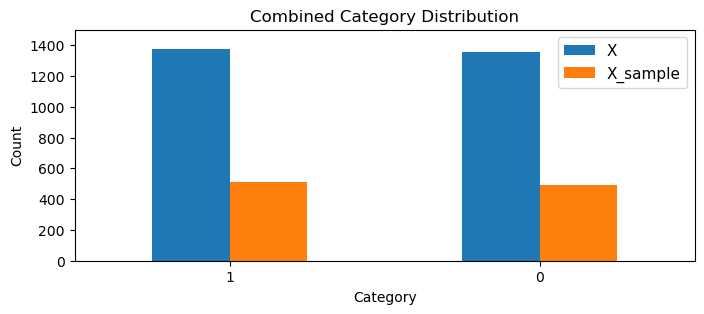

In [119]:
combined_data = pd.concat([df.score.value_counts(), df_sample.score.value_counts()], axis=1)
combined_data.columns = ['df', 'df_sample']
ax = combined_data.plot(kind='bar',
                        figsize=(8, 3))
ax.set_ylim([0, 1500]) 
ax.set_xticklabels(combined_data.index, rotation=0)

ax.set_title('Combined Category Distribution')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.legend(["X", "X_sample"], fontsize=11)

plt.show()

# Feature Creation

In [120]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Julia
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [122]:
df.head()

sentence  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   
4                                  The mic is great.      1   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]

In [123]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [124]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

# Feature subset selection

In [125]:
#計算每個 document 中，物件出現頻率
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

(2731, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [127]:
count_vect.get_feature_names_out()[4887]

'versatile'

In [128]:
count_vect.get_feature_names_out()[22]

'1998'

In [129]:
count_vect.get_feature_names_out()[696]

'cardellini'

In [130]:
count_vect.get_feature_names_out()[17]

'1973'

In [131]:
#remove not necessary words
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [132]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [135]:
print(df_counts.shape)

(2731, 5155)


In [136]:
df_array = df_counts[0:2731, 0:5155].toarray()

# Calculate the sum along rows (axis=0)
dfsums = np.sum(df_array, axis=0)
for number in dfsums:
    print(number)

1
36
3
2
4
3
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
2
1
1
2
1
1
1
2
1
7
1
1
3
1
1
1
5
1
1
1
2
1
1
4
1
3
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
7
1
1
1
1
1
5
4
1
85
7
1
1
1
21
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
2
3
43
7
1
1
1
1
10
19
3
3
1
16
1
1
2
1
1
2
3
4
2
1
1
1
1
1
6
1
1
2
4
3
1
1
1
1
2
2
52
2
49
2
4
1
1
1
9
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
149
1
1
1
2
2
2
1
14
3
5
1
1
4
74
8
1
24
35
1
1
3
34
1
9
7
3
2
2
2
2
8
1
2
1
106
1
1138
1
3
1
3
1
2
2
2
1
1
1
1
3
1
1
3
1
7
22
2
1
1
1
1
1
1
53
1
23
15
5
4
1
1
3
1
1
1
1
3
2
4
4
3
1
1
2
1
1
1
1
1
4
1
1
1
180
10
5
1
1
1
1
1
1
1
21
2
1
8
1
1
13
1
1
1
2
1
1
1
175
1
2
8
5
1
2
3
1
2
1
1
2
1
2
1
2
135
3
1
12
2
1
2
1
2
1
4
1
1
2
4
7
2
2
5
8
1
1
1
1
7
1
2
1
8
1
1
16
2
1
1
1
1
14
20
21
2
2
1
1
1
1
1
1
1
1
3
1
2
72
1
1
2
1
5
103
2
1
2
1
3
1
3
2
2
1
1
1
1
1
1
9
1
1
11
5
1
1
1
6
2
1
1
2
1
2
6
1
1
1
3
2
2
2
46
1
4
1
149
1
3
2
5
1
1
17
3
1
2
57
1
6
1
1
5
51
3
1
8
1
21
2
3
4
3
1
1
34
1
6
12
1
1
1
1
1
1
3
1
6
5
1
1
1
1
1
1
1
78
53
2
15
3
7
1

In [137]:
#the word that appears the most
largest = np.amax(dfsums)

In [138]:
#the average time a word would appear
mean = np.mean(dfsums)
mean

6.524345295829292

In [139]:
dfdoc_sums = np.sum(df_array, axis=1)
for i in dfdoc_sums:
    print(i)

19
4
4
12
4
16
21
9
6
6
6
14
19
4
15
10
6
4
2
16
16
12
6
16
12
5
18
10
17
3
12
13
9
12
20
24
6
4
10
2
17
6
4
5
3
6
10
15
5
3
10
9
15
14
3
10
2
18
22
8
7
12
21
6
17
29
8
17
4
7
3
18
2
7
4
3
9
5
12
10
9
3
9
5
11
10
4
7
15
4
24
3
2
9
4
5
11
8
28
5
7
10
2
16
18
16
15
22
20
11
23
11
26
4
2
15
13
7
6
5
24
6
6
2
4
2
6
16
12
6
20
6
10
2
4
8
6
6
14
4
2
16
6
2
10
10
4
6
10
9
4
6
13
21
9
22
8
7
5
4
21
2
9
14
21
2
13
17
3
11
2
6
9
8
13
5
24
23
9
16
4
21
9
13
16
1
2
2
4
21
6
8
11
9
2
7
7
2
5
4
16
8
11
8
5
5
11
13
3
5
23
10
3
26
2
4
3
14
3
5
2
21
5
9
16
9
15
2
16
17
7
5
6
4
7
6
5
11
13
8
5
8
4
9
7
3
5
9
4
18
10
8
10
7
18
4
10
2
4
7
4
10
2
2
5
5
3
3
4
3
13
2
3
8
6
4
7
3
9
5
4
3
7
8
9
5
3
3
22
2
3
2
5
8
10
18
7
4
10
3
6
5
2
19
7
4
11
14
9
10
5
16
11
11
25
8
16
4
3
7
10
7
12
15
4
12
7
2
5
2
18
4
19
25
17
7
2
12
18
3
3
12
6
3
21
7
3
15
16
5
6
6
8
4
13
15
12
5
14
4
19
13
5
9
2
3
12
3
17
12
13
5
12
17
19
6
14
8
3
4
13
6
14
2
12
3
5
4
11
3
14
4
8
10
4
14
4
9
12
2
3
5
5
6
6
23
4
19
6
6
5
22
10
13
7
13
16
8


In [140]:
#find the top 20 word frequency-doc
dfdoc20 = np.partition(dfdoc_sums, -20)[-20:]
for i in dfdoc20:
    print(i)

41
42
41
43
43
42
44
71
46
1234
176
44
54
259
55
67
48
51
773
700


In [160]:
#find the top 20 word frequency
dflargest20 = np.partition(dfsums, -100)[-100:]
for i in dflargest100:
    print(i)

and
but
for
good
great
in
is
it
my
not
of
on
that
the
this
to
very
was
with
you


In [161]:
#find the top 20 position
dfindices = np.where(np.isin(dfsums, dflargest20))
print(dfindices)

(array([  75,  154,  179,  193,  214,  216,  243,  273,  297,  314,  367,
        373,  416,  427,  433,  466,  467,  637,  647,  674, 1040, 1338,
       1352, 1580, 1585, 1603, 1742, 1822, 1829, 1883, 1954, 1982, 1993,
       2023, 2067, 2105, 2113, 2122, 2158, 2239, 2282, 2314, 2427, 2432,
       2493, 2638, 2710, 2737, 2809, 2931, 2954, 2963, 2982, 3026, 3032,
       3043, 3063, 3097, 3122, 3124, 3128, 3144, 3166, 3322, 3351, 3492,
       3568, 3626, 3994, 4161, 4176, 4201, 4526, 4529, 4531, 4537, 4545,
       4548, 4558, 4593, 4609, 4629, 4821, 4867, 4890, 4968, 4993, 5012,
       5015, 5017, 5021, 5025, 5032, 5049, 5069, 5091, 5096, 5107, 5138,
       5141], dtype=int64),)


In [162]:
#print out the word
dfvocab=[]
for i in dfindices:
    dfvocab.append(count_vect.get_feature_names_out()[i])
    print(count_vect.get_feature_names_out()[i])

['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'back'
 'bad' 'be' 'because' 'been' 'best' 'better' 'but' 'by' 'can' 'could' 'do'
 'don' 'even' 'ever' 'excellent' 'film' 'food' 'for' 'from' 'get' 'go'
 'good' 'great' 'had' 'has' 'have' 'he' 'here' 'how' 'if' 'in' 'is' 'it'
 'just' 'like' 'love' 'made' 'me' 'more' 'movie' 'much' 'my' 'never'
 'nice' 'no' 'not' 'of' 'on' 'one' 'only' 'or' 'out' 'phone' 'place'
 'product' 'quality' 'really' 'service' 'so' 'some' 'sound' 'than' 'that'
 'the' 'their' 'there' 'they' 'this' 'time' 'to' 'too' 'up' 've' 'very'
 'was' 'we' 'well' 'were' 'what' 'when' 'which' 'who' 'will' 'with' 'work'
 'works' 'would' 'you' 'your']


In [163]:
#Filter out Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
dflargest100 = ['about', 'after', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'back', 'bad', 'be', 'because', 'been', 'best', 'better', 'but', 'by', 'can', 'could', 'do', 'don', 'even', 'ever', 'excellent', 'film', 'food', 'for', 'from', 'get', 'go', 'good', 'great', 'had', 'has', 'have', 'he', 'here', 'how', 'if', 'in', 'is', 'it', 'just', 'like', 'love', 'made', 'me', 'more', 'movie', 'much', 'my', 'never', 'nice', 'no', 'not', 'of', 'on', 'one', 'only', 'or', 'out', 'phone', 'place', 'product', 'quality', 'really', 'service', 'so', 'some', 'sound', 'than', 'that', 'the', 'their', 'there', 'they', 'this', 'time', 'to', 'too', 'up', 've', 'very', 'was', 'we', 'well', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'work', 'works', 'would', 'you', 'your']
stop_words = set(stopwords.words('english'))
mask = [word for word in dflargest100 if word not in stop_words]
print(mask)


['also', 'back', 'bad', 'best', 'better', 'could', 'even', 'ever', 'excellent', 'film', 'food', 'get', 'go', 'good', 'great', 'like', 'love', 'made', 'movie', 'much', 'never', 'nice', 'one', 'phone', 'place', 'product', 'quality', 'really', 'service', 'sound', 'time', 'well', 'work', 'works', 'would']


[nltk_data] Downloading package stopwords to C:\Users\Julia
[nltk_data]     Yun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
vocab_index = []
feature_names = count_vect.get_feature_names_out()
feature_index_mapping = {feature: index for index, feature in enumerate(feature_names)}

for feature in mask:
    if feature in feature_index_mapping:
        vocab_index.append(feature_index_mapping[feature])

In [165]:
# which vocab to plot
plot_x = ["term_"+str(i) for i in mask]
print(plot_x)

['term_also', 'term_back', 'term_bad', 'term_best', 'term_better', 'term_could', 'term_even', 'term_ever', 'term_excellent', 'term_film', 'term_food', 'term_get', 'term_go', 'term_good', 'term_great', 'term_like', 'term_love', 'term_made', 'term_movie', 'term_much', 'term_never', 'term_nice', 'term_one', 'term_phone', 'term_place', 'term_product', 'term_quality', 'term_really', 'term_service', 'term_sound', 'term_time', 'term_well', 'term_work', 'term_works', 'term_would']


In [166]:
#choose random document
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39']


In [167]:
plot_z = []
for i in range(40):
    doc_freq = []
    for n in vocab_index:
        doc_freq.append(X_counts[i, n])
    plot_z.append(doc_freq)

term_also  term_back  term_bad  term_best  term_better  term_could  \
doc_0           0          0         0          0            0           0   
doc_1           0          0         0          0            0           0   
doc_2           0          0         0          0            0           0   
doc_3           0          0         0          0            0           0   
doc_4           0          0         0          0            0           0   
doc_5           0          0         0          0            0           0   
doc_6           0          0         0          0            0           0   
doc_7           0          0         0          0            0           0   
doc_8           0          0         0          0            0           0   
doc_9           0          0         0          0            0           0   
doc_10          0          0         0          0            0           0   
doc_11          0          0         0          0            0           0   
doc_12          0          0         0          0            0           0   
doc_13          0          0         0          0            0           0   
doc_14          0          0         0          0            0           0   
doc_15          0          0         0          0            0           0   
doc_16          0          0         0          0            0           0   
doc_17          0          0         0          0            0           0   
doc_18          0          0         0          0            0           0   
doc_19          0          0         0          0            0           0   
doc_20          0          0         0          0            0           0   
doc_21          0          0         0          0            0           0   
doc_22          0          0         0          0            0           0   
doc_23          0          0         0          0            0           0   
doc_24          0          0         0          0            0           0   
doc_25          0          0         0          0            0           0   
doc_26          0          0         0          0            0           0   
doc_27          0          0         0          0            0           0   
doc_28          0          0         0          0            0           0   
doc_29          0          0         0          0            0           0   
doc_30          0          0         0          0            0           0   
doc_31          0          0         0          0            0           0   
doc_32          0          0         0          0            0           0   
doc_33          0          0         0          0            0           0   
doc_34          0          0         0          0            0           0   
doc_35          0          0         0          0            0           0   
doc_36          0          0         0          0            0           0   
doc_37          0          0         0          0            0           0   
doc_38          1          0         0          0            0           0   
doc_39          0          0         0          0            0           0   

        term_even  term_ever  term_excellent  term_film  ...  term_product  \
doc_0           0          0               0          0  ...             0   
doc_1           0          0               0          0  ...             0   
doc_2           0          0               0          0  ...             0   
doc_3           0          0               0          0  ...             0   
doc_4           0          0               0          1  ...             0   
doc_5           0          0               0          0  ...             0   
doc_6           0          0               0          0  ...             0   
doc_7           0          0               0          0  ...             0   
doc_8           0          0               0          0  ...             0   
doc_9           0          0 

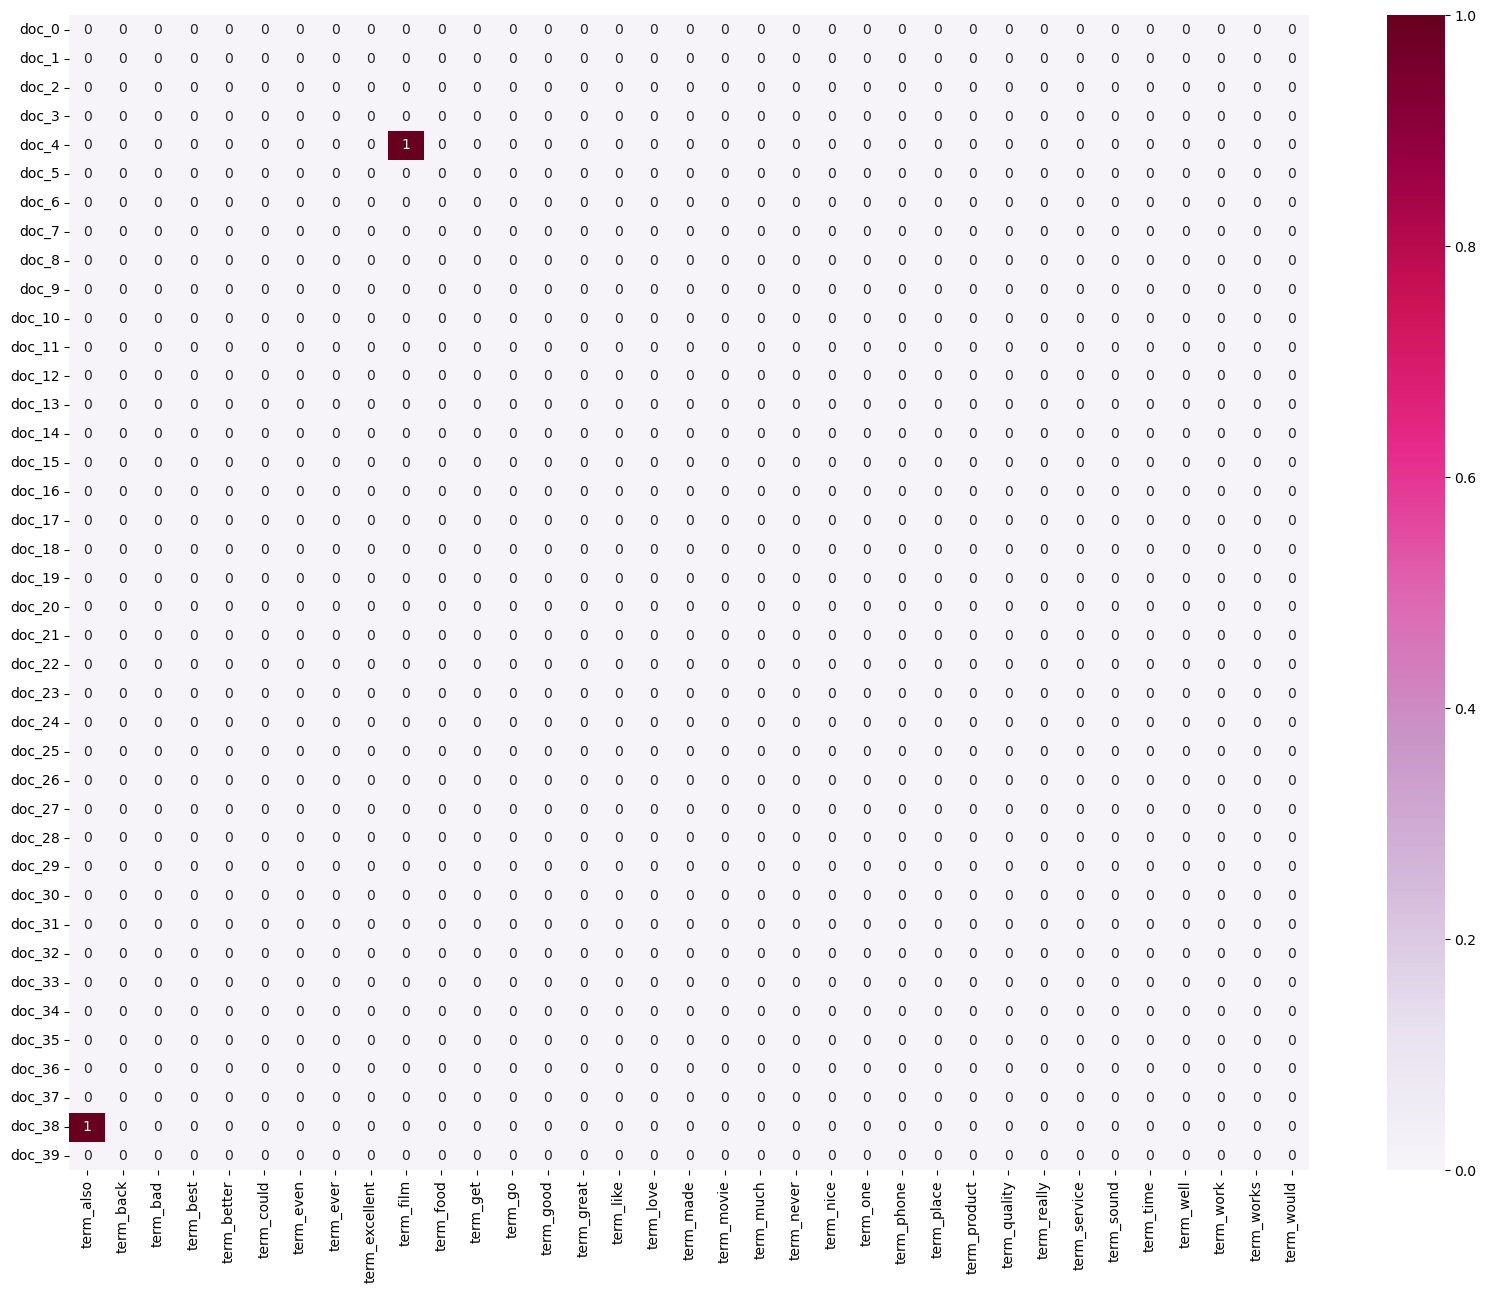

In [168]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Dimensionality Reduction

In [169]:
from sklearn.decomposition import PCA

In [178]:
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2731, 5155)
(2731, 2)


In [179]:
df_reduced.shape

(2731, 2)

In [ ]:
categories = [1, 0]

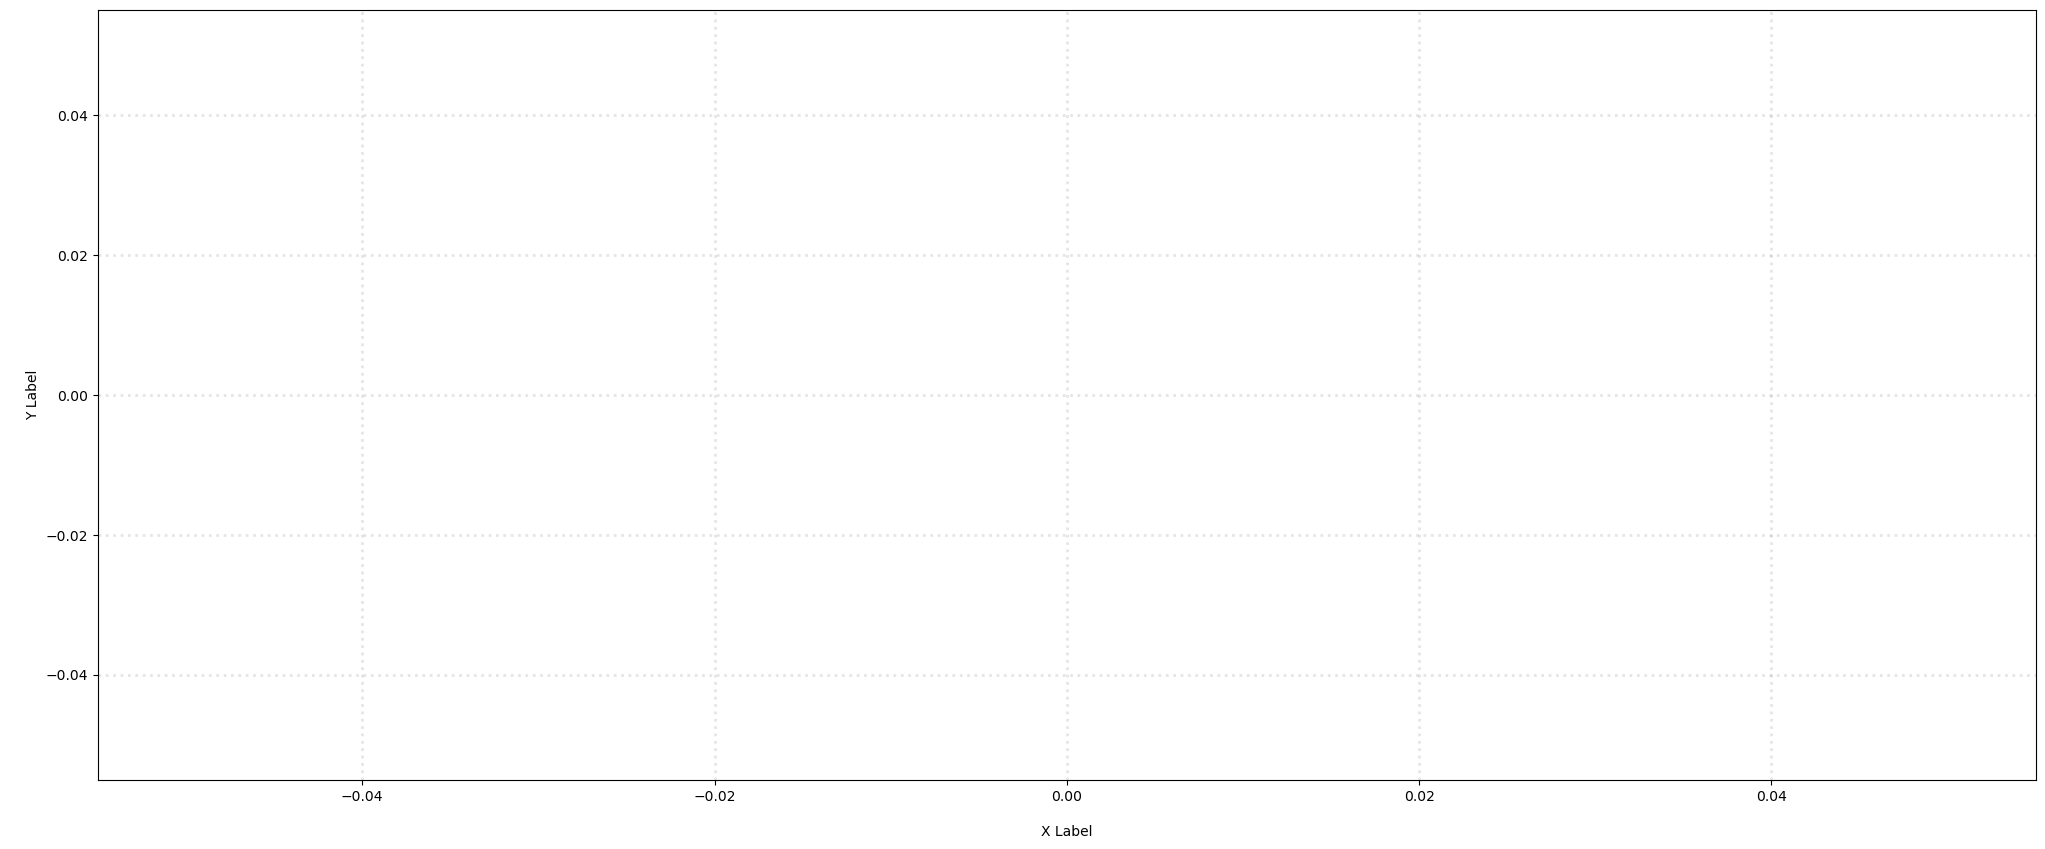

In [180]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['score'] == category].T[0]
    ys = df_reduced[df['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [181]:
# 降成三維
from sklearn.decomposition import PCA

print(df_counts.shape)
df_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2731, 5155)
(2257, 3)


In [182]:
df_reduced

array([[-17.01172954,   0.45016632,  -1.312261  ],
       [ -6.80574586,  -1.15880603,  -0.40488282],
       [ 15.79461065,   3.62233092,  12.70799024],
       ...,
       [ 19.97508176,  -2.85495804,   1.04076612],
       [163.88523745,  29.52467632,  -8.70179138],
       [-16.58569528,   0.61748553,  -1.88007223]])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['red', 'blue']

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['score'] == category].T[0]
    ys = df_reduced[df['score'] == category].T[1]
    zs = df_reduced[df['score'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# Attribute Transformation / Aggregation

In [184]:
#print(np.asarray(X_counts.sum(axis=0)))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
#column_sums = np.sum(z, axis=0)

print(np.asarray(df_counts.sum(axis=0))[0])

[ 1 36  3 ...  1  2  1]


In [185]:
term_frequencies[0]

1

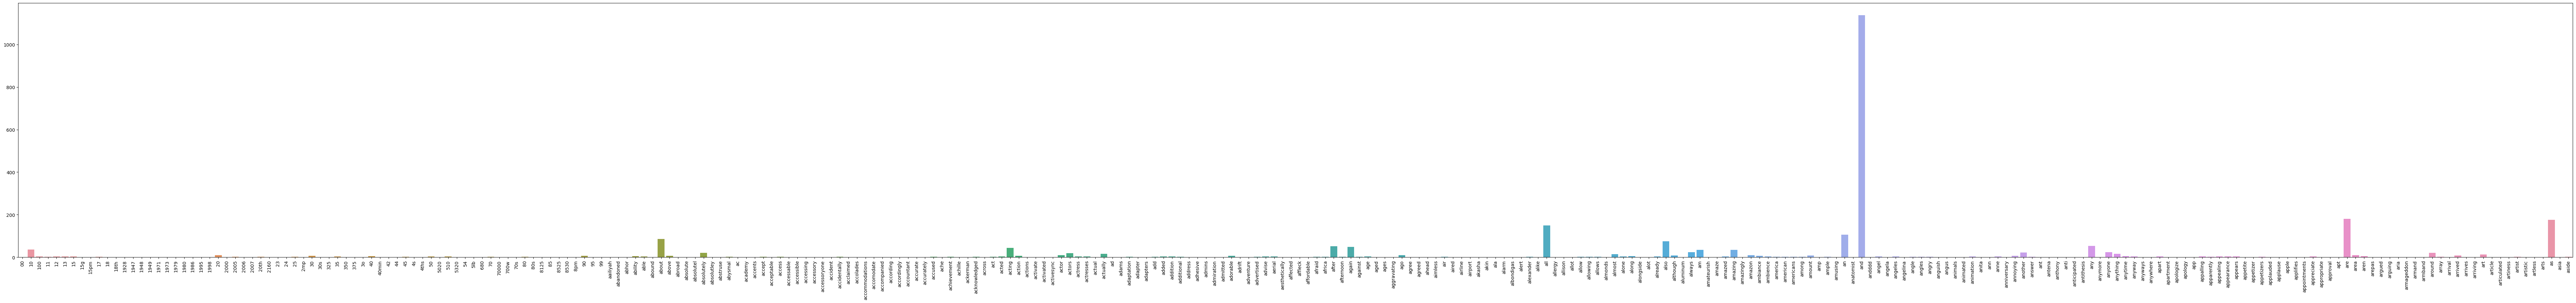

In [186]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [188]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
import pandas as pd
import plotly.express as px

# The data that is going to draw
data = pd.DataFrame({
    'Words': count_vect.get_feature_names_out()[:300],
    'Word Frequencies': term_frequencies[:300]
})

fig = px.bar(
    data, x='Words', y='Word Frequencies',
    title="Interactive Bar Chart of Word Frequency"
)

fig.update_xaxes(tickangle=45)  
fig.update_layout(
    width=3000, 
    height=400   
)

fig.show()

In [194]:
#find the word that appears more than 1000 times
mask = term_frequencies >= 500

In [195]:
index=[]
for i in enumerate(mask):
    if i[1]==True:
        index.append(i[0])

vocab=[]
for i in index:
    vocab.append(count_vect.get_feature_names()[i])

times=[]
sums = np.sum(X_array, axis=0)
for i in index:
    times.append(sums[i])
vocab.sort()
times.sort()

C:\Users\Julia Yun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



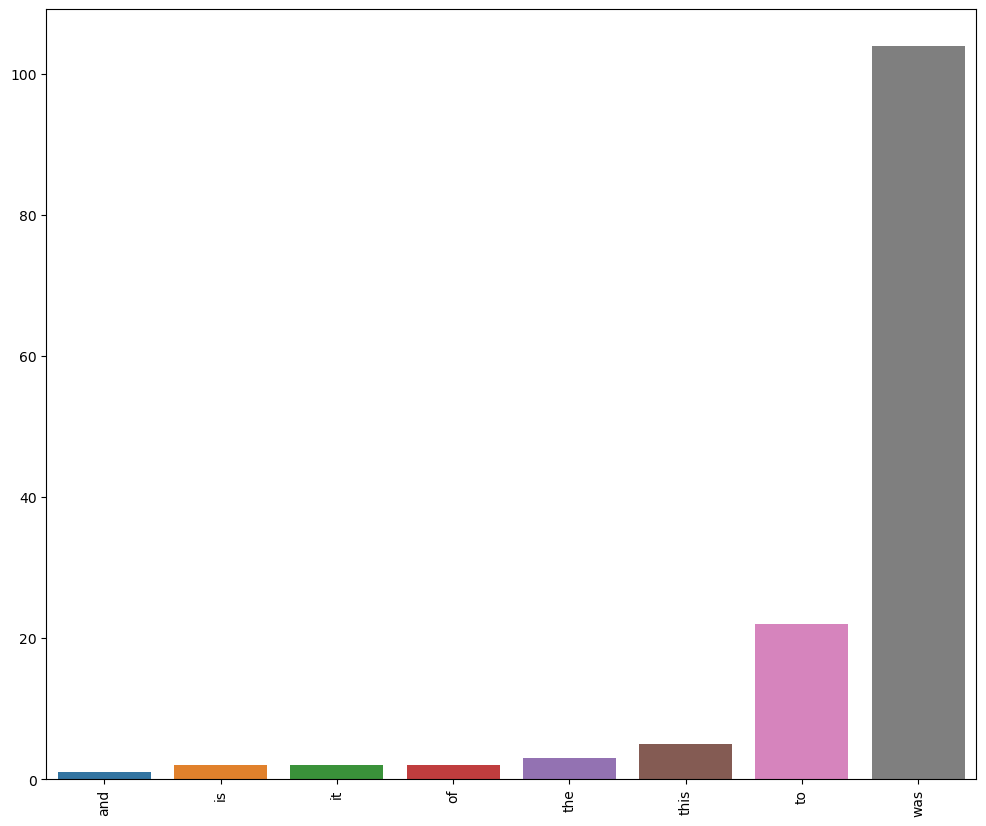

In [196]:
plt.subplots(figsize=(12, 10))


g = sns.barplot(x=vocab, 
            y=times)
g.set_xticklabels(vocab, rotation = 90);

In [197]:
data = pd.DataFrame({
    'Words': count_vect.get_feature_names_out()[:300],
    'Word Frequencies': term_frequencies[:300]
})
df = data.sort_values(by='Word Frequencies', ascending=False)

In [198]:
fig = px.bar(
    df, x='Words', y='Word Frequencies',
    title="Long-Tail nteractive Bar Chart of Word Frequency"
)

fig.update_xaxes(tickangle=45)  
fig.update_layout(
    width=3000, 
    height=400   
)

fig.show()

In [212]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [213]:
mlb.fit(df.score)

LabelBinarizer()

In [214]:
# 在 X 中新增欄位 bin_score
df['bin_score'] = mlb.transform(df['score']).tolist()
df['bin_score']

0       [0]
1       [1]
2       [1]
3       [0]
4       [1]
       ... 
2743    [0]
2744    [0]
2745    [0]
2746    [0]
2747    [0]
Name: bin_score, Length: 2731, dtype: object

In [215]:
df[0:9]

sentence  score bin_score
0  So there is no way for me to plug it in here i...      0       [0]
1                        Good case, Excellent value.      1       [1]
2                             Great for the jawbone.      1       [1]
3  Tied to charger for conversations lasting more...      0       [0]
4                                  The mic is great.      1       [1]
5  I have to jiggle the plug to get it to line up...      0       [0]
6  If you have several dozen or several hundred c...      0       [0]
7        If you are Razr owner...you must have this!      1       [1]
8                Needless to say, I wasted my money.      0       [0]

# Data Exploration

In [217]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [218]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [219]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [220]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Data Exploration

In [221]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[123]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)
print(random_record_1)
print(document_to_transform_1)
print("-----")


document_to_transform_2 = []
random_record_2 = df.iloc[132]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)
print(random_record_2)
print(document_to_transform_2)
print("-----")

document_to_transform_3 = []
random_record_3 = df.iloc[233]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)
print(random_record_3)
print(document_to_transform_3)

Bad Quality.
['Bad Quality.']
-----
Headset works great & was packaged nicely to avoid any damage.
['Headset works great & was packaged nicely to avoid any damage.']
-----
Great sound and service.
['Great sound and service.']


In [222]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

print(document_vector_count_1.shape)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print(document_vector_count_1_bin.shape)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

(1, 5155)
(1, 5155)
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [223]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.158114
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part3